In [1]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 비트코인 가격 예측

https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [2]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)


bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [3]:
from datetime import datetime

def changeDate(milis):
    # 타임스탬프를 초 단위로 변환
    timestamp = milis / 1000
    
    # 타임스탬프를 datetime 객체로 변환
    convorted_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')

    return convorted_time

In [4]:
bitcoin_df.loc[:,'x'] = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [5]:
bitcoin_df.set_index('x',inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [6]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


In [7]:
bitcoin_df = bitcoin_df['2022-01-01':]

In [8]:
pre_b_df = bitcoin_df.reset_index()
pre_b_df

,x,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [9]:
pre_b_df = pre_b_df.rename(columns={'x':'ds'})
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [10]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

13:25:40 - cmdstanpy - INFO - Chain [1] start processing
13:25:40 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2025-06-05,115741.510903,104303.335980,126459.828844
584,2025-06-06,116598.237382,104722.040586,127581.543365
585,2025-06-07,116090.169731,104417.729890,127337.676869
586,2025-06-08,115845.969887,104287.435294,126552.965559
587,2025-06-09,115967.625691,103802.427544,126783.611681


In [13]:
# fig, ax = plt.subplot(1,1,figsize = (12,6))

# plt.plot(pre_b_df[['y']])
# plt.plot(forev)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


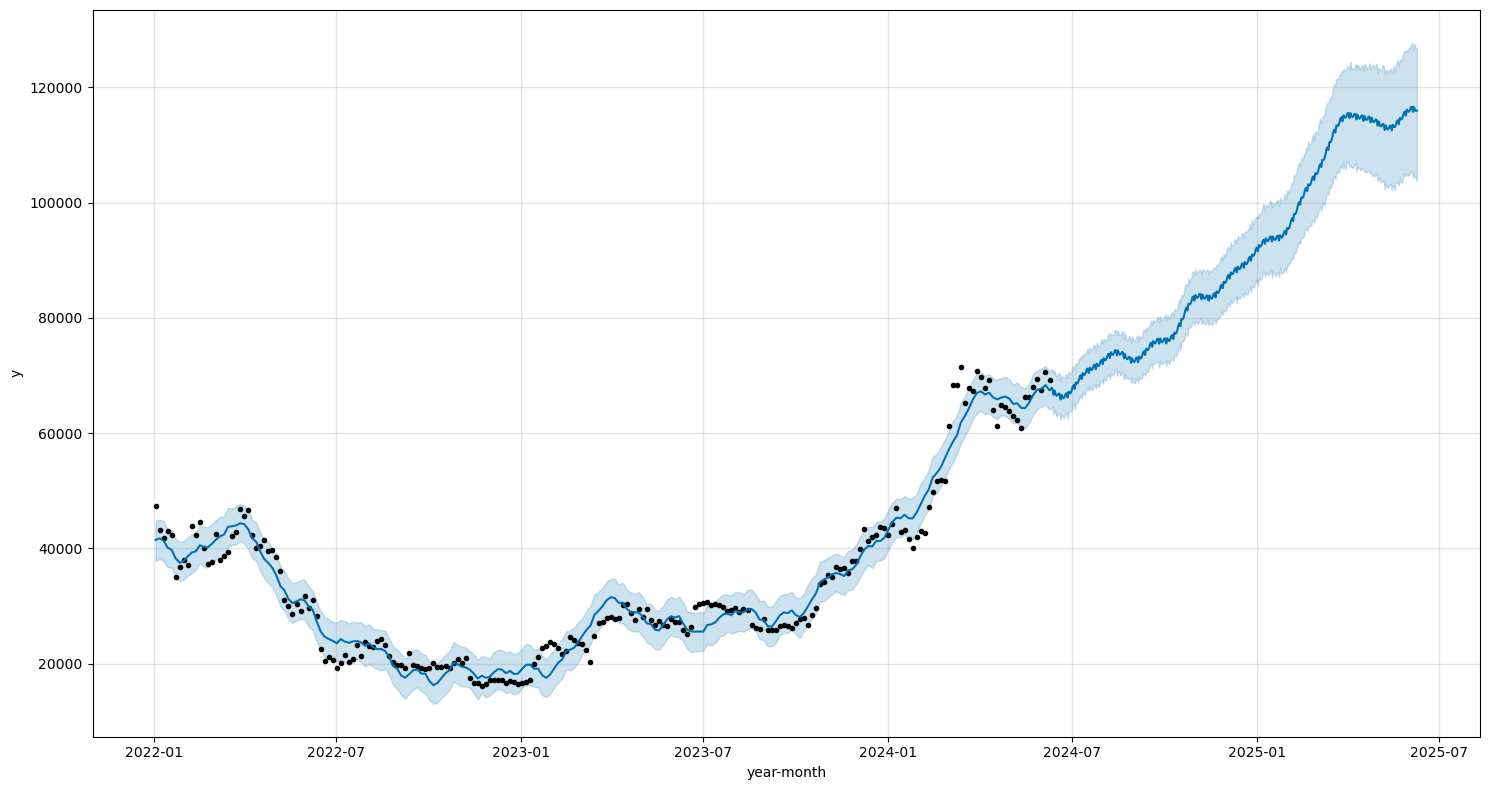

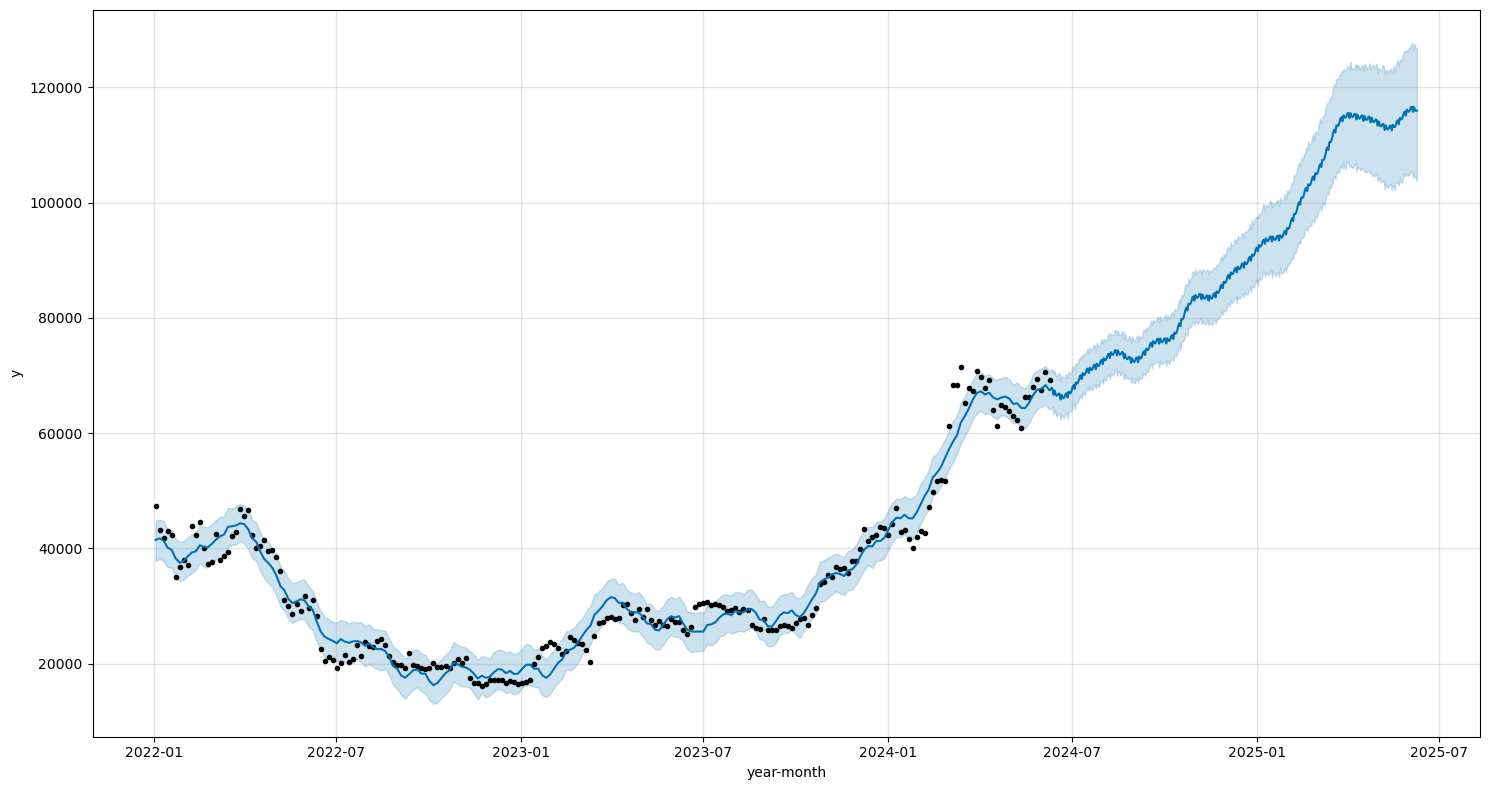

In [14]:
model.plot(forecast, figsize =(15,8), xlabel='year-month')

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

NameError: name 'plt' is not defined

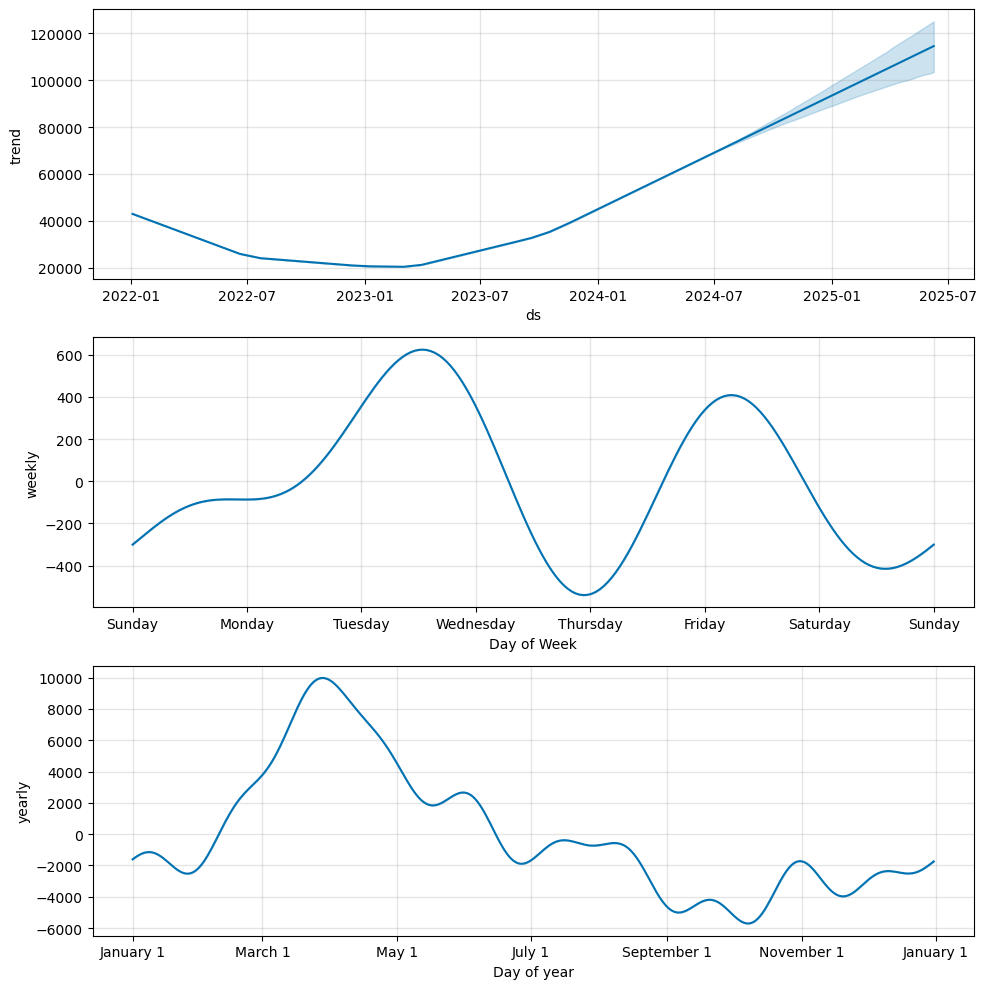

In [15]:
model.plot_components(forecast,figsize = (10,10))
plt.show()

### Prophet 심화

In [16]:
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [18]:
train_df = pre_b_df.iloc[:int(len(pre_b_df)*0.8)]
train_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
173,2023-11-26,37800.94
174,2023-11-30,37867.37
175,2023-12-04,39976.04
176,2023-12-08,43298.70


In [23]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
# 경우의 수 조합
import itertools

# changepoint_prior_scale : trend의 변화하는 크기를 반영하는 정도이다. 0.05가 default
# 이 수치를 변경할 때 변화가 가장크다.
# seasonality_prior_scale : 계절성을 반영하는 단위이다. 
# seasonality_mode : 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
# additive - 덧셈
# multiplicative - 곱셈 : 너무 변화가 안보일때 사용
search_space = {
    'changepoint_prior_scale':[0.05,0.1,0.5,1.0,5.0,10.0],
    'seasonality_prior_scale': [0.05,0.1,1.0,10.0],
    'seasonality_mode':['additive','multiplicative']
}

# itertools.product 각 요소를 모든 경우의 수 조합으로 생성
param_combinded  = [dict(zip(search_space.keys(),v)) for v in itertools.product(*search_space.values())]


train_len = int(len(pre_b_df)*0.8)
test_len = int(len(pre_b_df)*0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'

train_df = pre_b_df.iloc[:train_len] 
test_df =pre_b_df.iloc[train_len:] 

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    
    # threads 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # dask 옵션은 대규모의 데이터를 처리하는데 효과적이다.
    # processes 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 파운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.

    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

13:47:58 - cmdstanpy - INFO - Chain [1] start processing
13:47:58 - cmdstanpy - INFO - Chain [1] done processing
13:48:01 - cmdstanpy - INFO - Chain [1] start processing
13:48:02 - cmdstanpy - INFO - Chain [1] done processing
13:48:05 - cmdstanpy - INFO - Chain [1] start processing
13:48:05 - cmdstanpy - INFO - Chain [1] done processing
13:48:08 - cmdstanpy - INFO - Chain [1] start processing
13:48:09 - cmdstanpy - INFO - Chain [1] done processing
13:48:12 - cmdstanpy - INFO - Chain [1] start processing
13:48:12 - cmdstanpy - INFO - Chain [1] done processing
13:48:15 - cmdstanpy - INFO - Chain [1] start processing
13:48:15 - cmdstanpy - INFO - Chain [1] done processing
13:48:19 - cmdstanpy - INFO - Chain [1] start processing
13:48:19 - cmdstanpy - INFO - Chain [1] done processing
13:48:22 - cmdstanpy - INFO - Chain [1] start processing
13:48:23 - cmdstanpy - INFO - Chain [1] done processing
13:48:26 - cmdstanpy - INFO - Chain [1] start processing
13:48:26 - cmdstanpy - INFO - Chain [1]

In [25]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
19,0.50,0.10,multiplicative,0.143376
17,0.50,0.05,multiplicative,0.143557
21,0.50,1.00,multiplicative,0.143878
23,0.50,10.00,multiplicative,0.143935
18,0.50,0.10,additive,0.144873
33,5.00,0.05,multiplicative,0.144967
41,10.00,0.05,multiplicative,0.145168
35,5.00,0.10,multiplicative,0.145253
39,5.00,10.00,multiplicative,0.145380
43,10.00,0.10,multiplicative,0.145405


In [26]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='multiplicative')

model.fit(pre_b_df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
583,2025-06-05,125823.856555,67842.538003,190546.788225
584,2025-06-06,129113.355299,69956.372419,195982.641831
585,2025-06-07,127408.280463,68351.074536,193235.093215
586,2025-06-08,125298.219561,67055.172760,190237.862447
587,2025-06-09,125407.606181,67489.996853,188751.909214


In [27]:
b_df = pre_b_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df.set_index('ds', inplace=True)

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


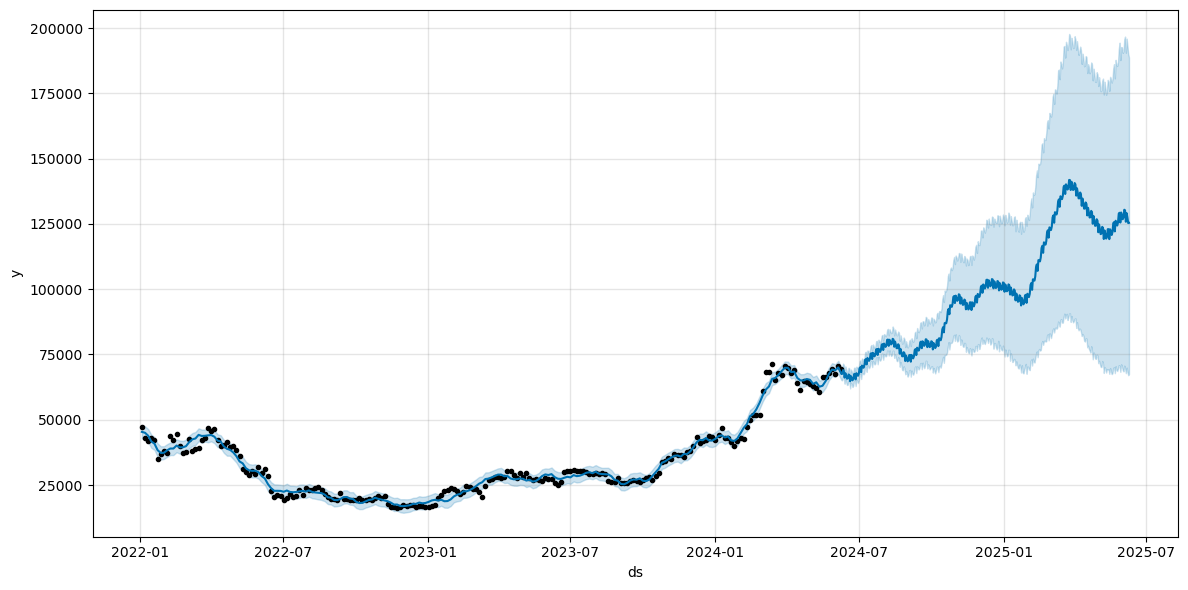

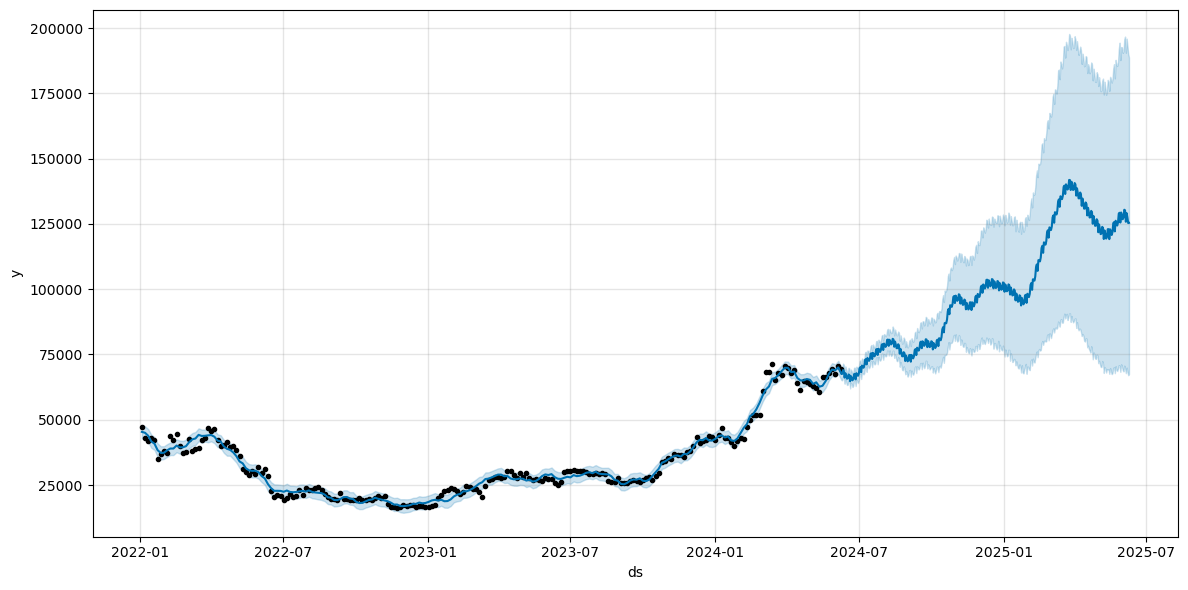

In [28]:
model.plot(forecast, figsize =(12,6))

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

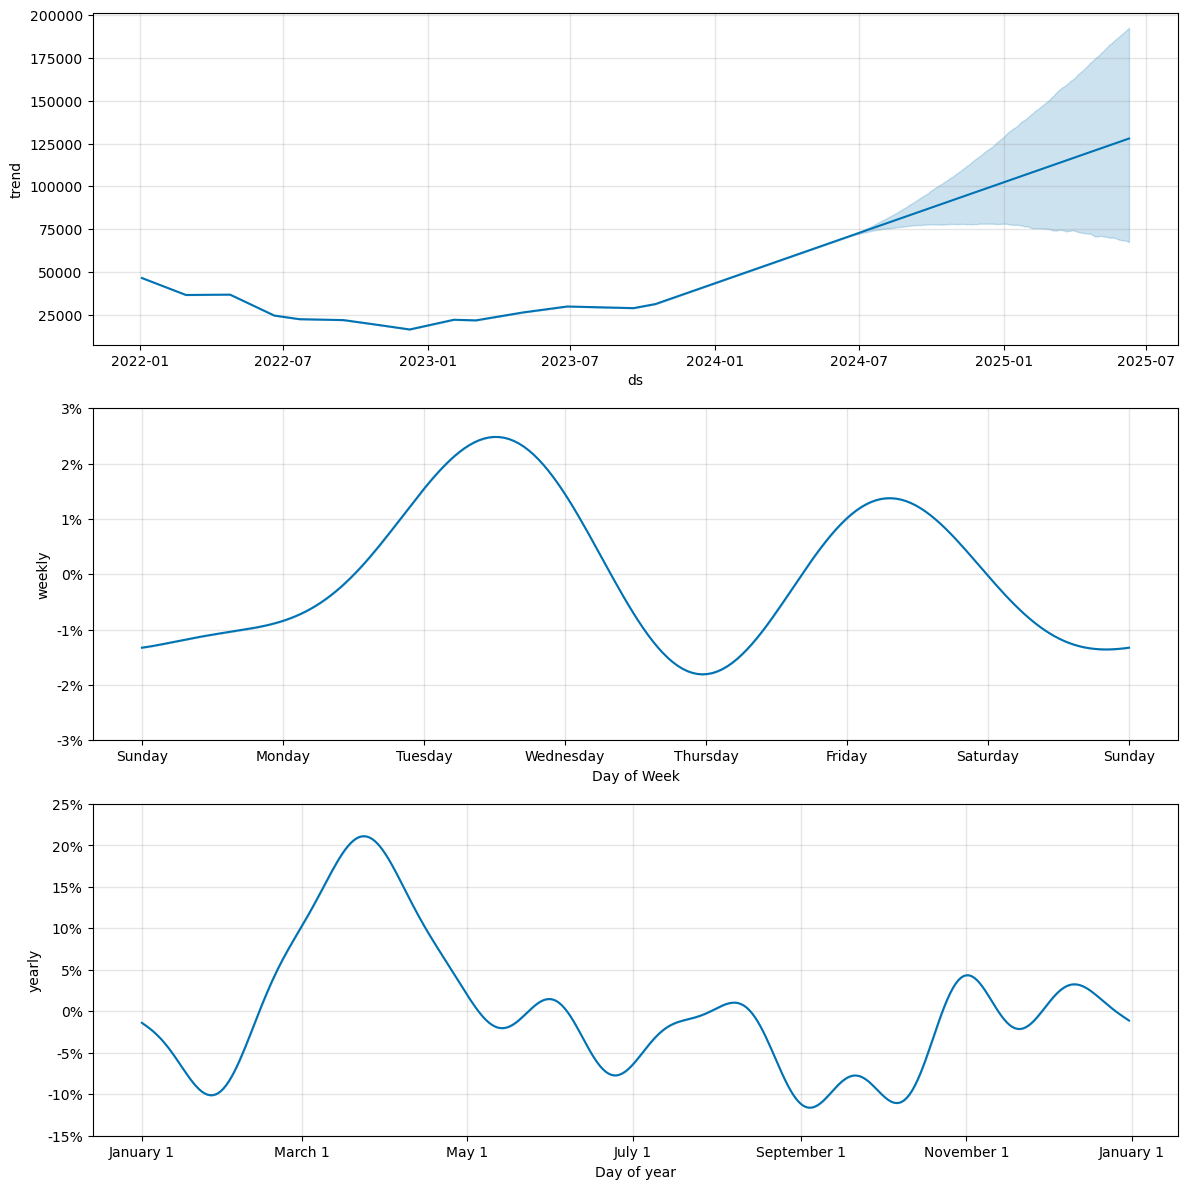

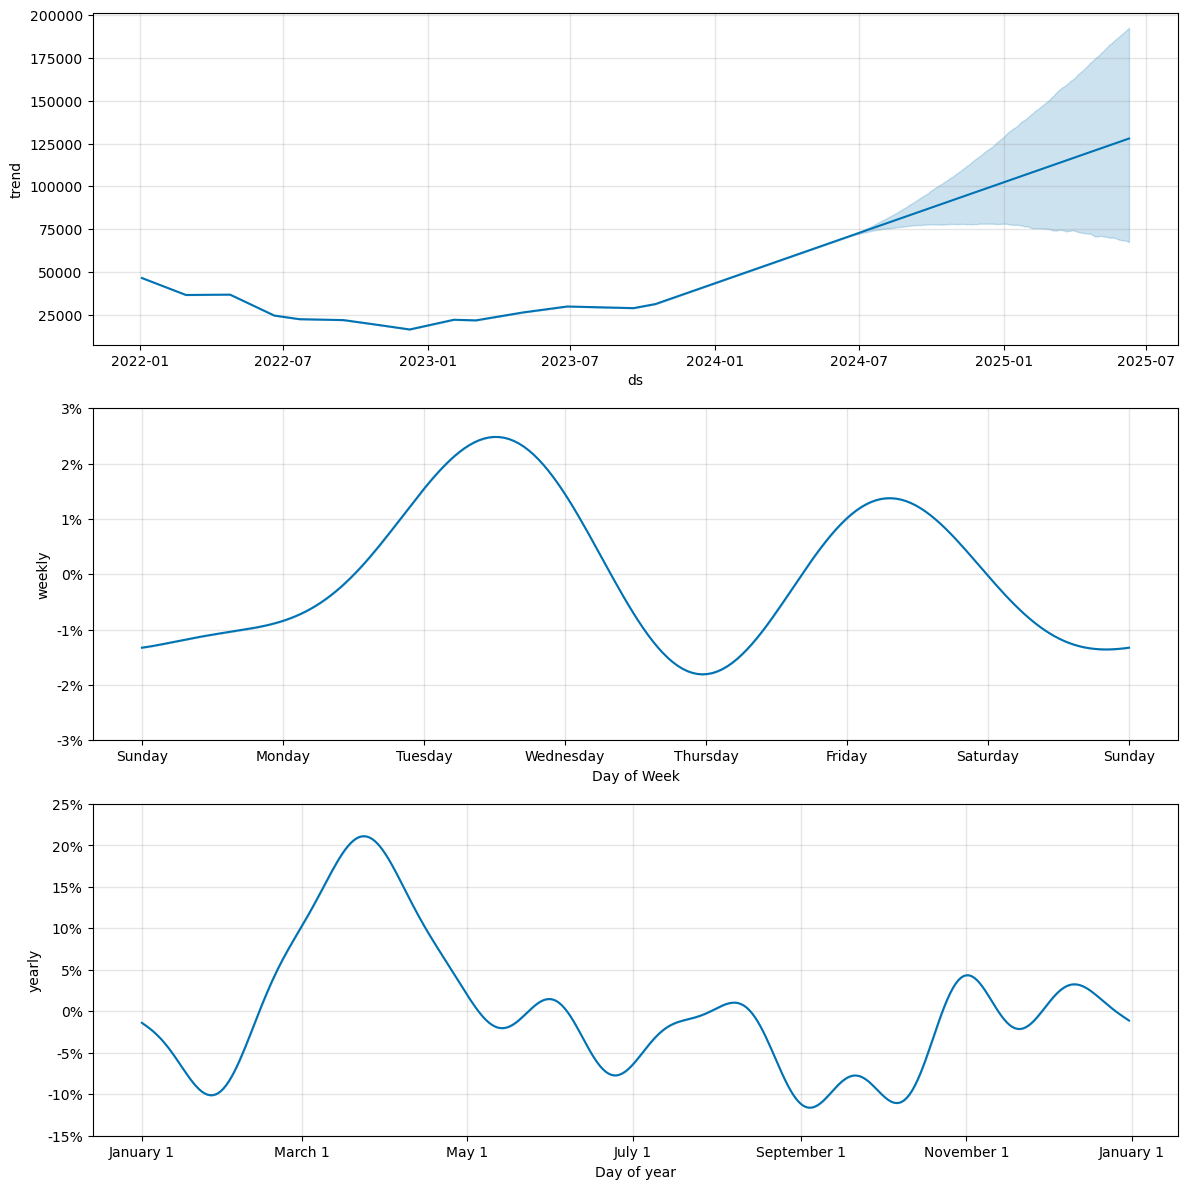

In [30]:
model.plot_components(forecast, figsize=(12,12))